In [13]:
#importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from joblib import load
from joblib import dump
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

In [48]:
human_df = pd.read_csv(r'C:\Users\Padmajaa\OneDrive - SSN Trust\sih24\ml keystroke\keystroke ds.csv')

In [49]:
human_df

,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,s002,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,...,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,s002,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,...,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20395,s057,8,46,0.0884,0.0685,-0.0199,0.1095,0.1290,0.0195,0.0945,...,0.1219,0.1383,0.0164,0.0820,0.1329,0.0509,0.1005,0.2054,0.1049,0.1047
20396,s057,8,47,0.0655,0.0630,-0.0025,0.0910,0.1148,0.0238,0.0916,...,0.1008,0.0512,-0.0496,0.1037,0.0868,-0.0169,0.1445,0.2206,0.0761,0.1198
20397,s057,8,48,0.0939,0.1189,0.0250,0.1008,0.1122,0.0114,0.0721,...,0.0913,0.1169,0.0256,0.0689,0.1311,0.0622,0.1034,0.2017,0.0983,0.0905
20398,s057,8,49,0.0923,0.1294,0.0371,0.0913,0.0990,0.0077,0.0992,...,0.0882,0.0821,-0.0061,0.0576,0.0697,0.0121,0.0979,0.1917,0.0938,0.0931


In [50]:
drop1=['subject','sessionIndex','rep']
df=human_df.drop(columns=drop1)

In [51]:
df.columns

Index(['H.period', 'DD.period.t', 'UD.period.t', 'H.t', 'DD.t.i', 'UD.t.i',
       'H.i', 'DD.i.e', 'UD.i.e', 'H.e', 'DD.e.five', 'UD.e.five', 'H.five',
       'DD.five.Shift.r', 'UD.five.Shift.r', 'H.Shift.r', 'DD.Shift.r.o',
       'UD.Shift.r.o', 'H.o', 'DD.o.a', 'UD.o.a', 'H.a', 'DD.a.n', 'UD.a.n',
       'H.n', 'DD.n.l', 'UD.n.l', 'H.l', 'DD.l.Return', 'UD.l.Return',
       'H.Return'],
      dtype='object')

In [52]:
features=['H.period', 'DD.period.t', 'UD.period.t', 'H.t', 'DD.t.i', 'UD.t.i',
       'H.i', 'DD.i.e', 'UD.i.e', 'H.e', 'DD.e.five', 'UD.e.five', 'H.five',
       'DD.five.Shift.r', 'UD.five.Shift.r', 'H.Shift.r', 'DD.Shift.r.o',
       'UD.Shift.r.o', 'H.o', 'DD.o.a', 'UD.o.a', 'H.a', 'DD.a.n', 'UD.a.n',
       'H.n', 'DD.n.l', 'UD.n.l', 'H.l', 'DD.l.Return', 'UD.l.Return',
       'H.Return']

In [53]:
X_train, X_test = train_test_split(df[features], test_size=0.2, random_state=42)

In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
def manhattan_distance(X, Y):
    return np.sum(np.abs(X - Y), axis=1)

In [56]:
def detect_anomalies(X_train, X_test, threshold_percentile=85):
    anomalies = []
    
    for x_test in X_test:
        distances = manhattan_distance(X_train, x_test)  # Compute distances to all training points
        min_distance = np.min(distances)  # Minimum distance to any training point
        
        # Compute threshold based on the training set distances
        threshold = np.percentile(distances, threshold_percentile)
        
        # If the minimum distance is greater than the threshold, it's an anomaly
        if min_distance > threshold:
            anomalies.append(True)  # Anomaly (likely bot)
        else:
            anomalies.append(False)  # Not an anomaly (likely human)
    
    return anomalies

In [57]:
anomalies = detect_anomalies(X_train_scaled, X_test_scaled)

In [58]:
X_test['anomaly'] = anomalies

In [72]:
print(X_test)

       H.period  DD.period.t  UD.period.t     H.t  DD.t.i  UD.t.i     H.i  \
3482     0.1452       0.1982       0.0530  0.1309  0.1082 -0.0227  0.1454   
9387     0.0905       0.1485       0.0580  0.0708  0.1273  0.0565  0.0541   
4269     0.0673       0.1192       0.0519  0.0692  0.0597 -0.0095  0.0628   
20135    0.0762       0.3185       0.2423  0.0936  0.0976  0.0040  0.0868   
18788    0.1060       0.1400       0.0340  0.0617  0.1097  0.0480  0.1087   
...         ...          ...          ...     ...     ...     ...     ...   
14200    0.2189       1.4485       1.2296  0.1150  0.2276  0.1126  0.1198   
20066    0.1424       0.3298       0.1874  0.0810  0.0963  0.0153  0.0913   
6612     0.0987       0.2176       0.1189  0.0995  0.1922  0.0927  0.1101   
16974    0.0836       0.4024       0.3188  0.1219  0.1694  0.0475  0.0551   
4356     0.0919       0.1124       0.0205  0.1095  0.1209  0.0114  0.0781   

       DD.i.e  UD.i.e     H.e  ...  DD.a.n  UD.a.n     H.n  DD.n.l  UD.n.l 

In [68]:
def generate_bot_data(num_samples, feature_size):
    # Create uniform bot-like behavior with small variation in timings
    bot_data = np.full((num_samples, feature_size), 0.3) + np.random.normal(0, 0.2, (num_samples, feature_size))
    return bot_data

# Number of samples and feature size (same as human data)
num_bot_samples = 50
feature_size = X_train_scaled.shape[1]  # Based on the number of features in the training set

# Generate bot test data
bot_test_data = generate_bot_data(num_bot_samples, feature_size)

# Combine human and bot test data
X_test_combined = np.vstack([X_test_scaled, bot_test_data])

# Create labels for evaluation (human = 0, bot = 1)
y_test = np.hstack([np.zeros(len(X_test_scaled)), np.ones(num_bot_samples)])


In [69]:
# Run the model on the combined test set (human + bot data)
anomalies = detect_anomalies(X_train_scaled, X_test_combined)

# Compare detected anomalies with actual labels (0 for human, 1 for bot)
y_pred = np.array(anomalies).astype(int)

# Display results
print("Predicted anomalies (1 = bot, 0 = human):", y_pred)
print("Actual labels (1 = bot, 0 = human):", y_test)


Predicted anomalies (1 = bot, 0 = human): [0 0 0 ... 0 0 0]
Actual labels (1 = bot, 0 = human): [0. 0. 0. ... 1. 1. 1.]


In [70]:
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report
print(classification_report(y_test, y_pred, target_names=['Human', 'Bot']))

# Print confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)


              precision    recall  f1-score   support

       Human       0.99      1.00      0.99      4080
         Bot       0.00      0.00      0.00        50

    accuracy                           0.99      4130
   macro avg       0.49      0.50      0.50      4130
weighted avg       0.98      0.99      0.98      4130

Confusion Matrix:
 [[4080    0]
 [  50    0]]


c:\Users\Padmajaa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Padmajaa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Padmajaa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

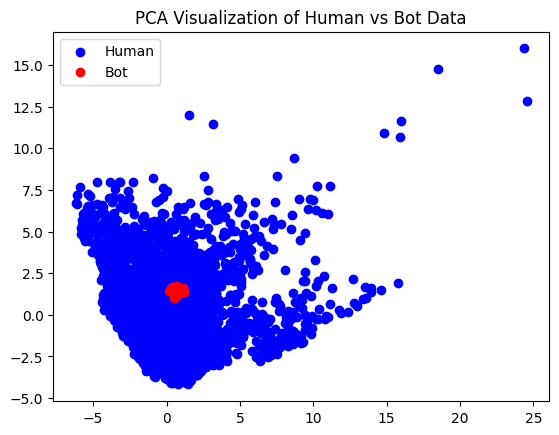

In [71]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Use PCA for 2D visualization
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_combined)

# Plot the human and bot points
plt.scatter(X_test_pca[:len(X_test_scaled), 0], X_test_pca[:len(X_test_scaled), 1], color='blue', label='Human')
plt.scatter(X_test_pca[len(X_test_scaled):, 0], X_test_pca[len(X_test_scaled):, 1], color='red', label='Bot')
plt.legend()
plt.title("PCA Visualization of Human vs Bot Data")
plt.show()


In [3]:
data = pd.read_csv("keystroke ds.csv")


In [4]:
subjects = data["subject"].unique()


In [5]:
def evaluateEER(user_scores, imposter_scores):
    labels = [0]*len(user_scores) + [1]*len(imposter_scores)
    fpr, tpr, thresholds = roc_curve(labels, user_scores + imposter_scores)
    missrates = 1 - tpr
    farates = fpr
    dists = missrates - farates
    idx1 = np.argmin(dists[dists >= 0])
    idx2 = np.argmax(dists[dists < 0])
    x = [missrates[idx1], farates[idx1]]
    y = [missrates[idx2], farates[idx2]]
    a = ( x[0] - x[1] ) / ( y[1] - x[1] - y[0] + x[0] )
    eer = x[0] + a * ( y[0] - x[0] )
    return eer

In [6]:
class EuclideanDetector:
    
    def __init__(self, subjects):
        self.train = train
        self.test_genuine = test_genuine
        self.test_imposter = test_imposter
        self.user_scores = []
        self.imposter_scores = []
        self.mean_vector = []
        self.subjects = subjects
        
    def training(self):
        self.mean_vector = self.train.mean().values
        
    def testing(self):
        for i in range(self.test_genuine.shape[0]):
            cur_score = np.linalg.norm(self.test_genuine.iloc[i].values - self.mean_vector)
            self.user_scores.append(cur_score)
            
        for i in range(self.test_imposter.shape[0]):
            cur_score = np.linalg.norm(self.test_imposter.iloc[i].values - self.mean_vector)
            self.imposter_scores.append(cur_score)
    
    def evaluate(self):
        eers = []
        
        for subject in subjects:
            
            self.user_scores = []
            self.imposter_scores = []
    
            # Consider current subject as genuine and rest as imposters
            genuine_user_data = data.loc[data.subject == subject, "H.period":"H.Return"]
            imposter_data = data.loc[data.subject != subject, :]
    
            # genuine user's first 200 time vectors for training
            self.train = genuine_user_data[:200]
    
            # True set (200 records)
            self.test_genuine = genuine_user_data[200:]
    
            # False set (250 records, 5 per imposter, 50 imposters in all)
            self.test_imposter = imposter_data.groupby("subject").head(5).loc[:, "H.period":"H.Return"]
            
            self.training()
            
            self.testing()
    
            eers.append(evaluateEER(self.user_scores, self.imposter_scores))
        
        return np.mean(eers), np.std(eers)      

In [7]:
class EuclideanNormedDetector:
    
    def __init__(self, subjects):
        self.train = train
        self.test_genuine = test_genuine
        self.test_imposter = test_imposter
        self.user_scores = []
        self.imposter_scores = []
        self.mean_vector = []
        self.subjects = subjects
        
    def training(self):
        self.mean_vector = self.train.mean().values
        
    def testing(self):
        for i in range(self.test_genuine.shape[0]):
            cur_score = np.linalg.norm(self.test_genuine.iloc[i].values - self.mean_vector)**2
            cur_score = cur_score / np.linalg.norm(self.test_genuine.iloc[i].values)
            cur_score = cur_score / np.linalg.norm(self.mean_vector)
            self.user_scores.append(cur_score)
            
        for i in range(self.test_imposter.shape[0]):
            cur_score = np.linalg.norm(self.test_imposter.iloc[i].values - self.mean_vector)**2
            cur_score = cur_score / np.linalg.norm(self.test_imposter.iloc[i].values)
            cur_score = cur_score / np.linalg.norm(self.mean_vector)
            self.imposter_scores.append(cur_score)
    
    def evaluate(self):
        eers = []
        
        for subject in subjects:
            
            self.user_scores = []
            self.imposter_scores = []
    
            # Consider current subject as genuine and rest as imposters
            genuine_user_data = data.loc[data.subject == subject, "H.period":"H.Return"]
            imposter_data = data.loc[data.subject != subject, :]
    
            # genuine user's first 200 time vectors for training
            self.train = genuine_user_data[:200]
    
            # True set (200 records)
            self.test_genuine = genuine_user_data[200:]
    
            # False set (250 records, 5 per imposter, 50 imposters in all)
            self.test_imposter = imposter_data.groupby("subject").head(5).loc[:, "H.period":"H.Return"]
            
            self.training()
            
            self.testing()
    
            eers.append(evaluateEER(self.user_scores, self.imposter_scores))
        
        return np.mean(eers), np.std(eers)   

In [8]:
class ManhattanDetector:
    
    def __init__(self, subjects):
        self.train = train
        self.test_genuine = test_genuine
        self.test_imposter = test_imposter
        self.user_scores = []
        self.imposter_scores = []
        self.mean_vector = []
        self.subjects = subjects
        
    def training(self):
        self.mean_vector = self.train.mean().values
        
    def testing(self):
        for i in range(self.test_genuine.shape[0]):
            cur_score = cityblock(self.test_genuine.iloc[i].values, self.mean_vector)
            self.user_scores.append(cur_score)
            
        for i in range(self.test_imposter.shape[0]):
            cur_score = cityblock(self.test_imposter.iloc[i].values, self.mean_vector)
            self.imposter_scores.append(cur_score)
    
    def evaluate(self):
        eers = []
        
        for subject in subjects:
            
            self.user_scores = []
            self.imposter_scores = []
    
            # Consider current subject as genuine and rest as imposters
            genuine_user_data = data.loc[data.subject == subject, "H.period":"H.Return"]
            imposter_data = data.loc[data.subject != subject, :]
    
            # genuine user's first 200 time vectors for training
            self.train = genuine_user_data[:200]
    
            # True set (200 records)
            self.test_genuine = genuine_user_data[200:]
    
            # False set (250 records, 5 per imposter, 50 imposters in all)
            self.test_imposter = imposter_data.groupby("subject").head(5).loc[:, "H.period":"H.Return"]
            
            self.training()
            
            self.testing()
    
            eers.append(evaluateEER(self.user_scores, self.imposter_scores))
        
        return np.mean(eers), np.std(eers)        

In [9]:
class ManhattanFilteredDetector:
    
    def __init__(self, subjects):
        self.train = train
        self.test_genuine = test_genuine
        self.test_imposter = test_imposter
        self.user_scores = []
        self.imposter_scores = []
        self.mean_vector = []
        self.subjects = subjects
        
    def training(self):
        self.mean_vector = self.train.mean().values
        self.std_vector = self.train.std().values
        dropping_indices = []
        for i in range(train.shape[0]):
            cur_score = euclidean(self.train.iloc[i].values, self.mean_vector)
            if (cur_score > 3*self.std_vector).all() == True:
                dropping_indices.append(i)
        self.train = self.train.drop(self.train.index[dropping_indices])
        self.mean_vector = self.train.mean().values
        
    def testing(self):
        for i in range(self.test_genuine.shape[0]):
            cur_score = cityblock(self.test_genuine.iloc[i].values, self.mean_vector)
            self.user_scores.append(cur_score)
            
        for i in range(self.test_imposter.shape[0]):
            cur_score = cityblock(self.test_imposter.iloc[i].values, self.mean_vector)
            self.imposter_scores.append(cur_score)
    
    def evaluate(self):
        eers = []
        
        for subject in subjects:
            
            self.user_scores = []
            self.imposter_scores = []
    
            # Consider current subject as genuine and rest as imposters
            genuine_user_data = data.loc[data.subject == subject, "H.period":"H.Return"]
            imposter_data = data.loc[data.subject != subject, :]
    
            # genuine user's first 200 time vectors for training
            self.train = genuine_user_data[:200]
    
            # True set (200 records)
            self.test_genuine = genuine_user_data[200:]
    
            # False set (250 records, 5 per imposter, 50 imposters in all)
            self.test_imposter = imposter_data.groupby("subject").head(5).loc[:, "H.period":"H.Return"]
            
            self.training()
            
            self.testing()
    
            eers.append(evaluateEER(self.user_scores, self.imposter_scores))
        
        return np.mean(eers), np.std(eers)   

In [11]:
from scipy.spatial.distance import cityblock, mahalanobis, euclidean

In [12]:
ManhattanFilteredDetector(subjects).evaluate()


NameError: name 'train' is not defined

In [15]:
subjects = data["subject"].unique()

def evaluateEER(user_scores, imposter_scores):
    labels = [0]*len(user_scores) + [1]*len(imposter_scores)
    fpr, tpr, thresholds = roc_curve(labels, user_scores + imposter_scores)
    missrates = 1 - tpr
    farates = fpr
    dists = missrates - farates
    idx1 = np.argmin(dists[dists >= 0])
    idx2 = np.argmax(dists[dists < 0])
    x = [missrates[idx1], farates[idx1]]
    y = [missrates[idx2], farates[idx2]]
    a = (x[0] - x[1]) / (y[1] - x[1] - y[0] + x[0])
    eer = x[0] + a * (y[0] - x[0])
    return eer

class ManhattanFilteredDetector:
    
    def __init__(self, subjects):
        self.user_scores = []
        self.imposter_scores = []
        self.mean_vector = []
        self.std_vector = []
        self.subjects = subjects
        
    def training(self):
        # Compute mean and std dev vectors for the training data
        self.mean_vector = self.train.mean().values
        self.std_vector = self.train.std().values
        
        dropping_indices = []
        
        # Check each training sample
        for i in range(self.train.shape[0]):
            cur_score = euclidean(self.train.iloc[i].values, self.mean_vector)
            
            # Drop if any feature exceeds 3 times its std dev from the mean
            if (cur_score > 3 * self.std_vector).any():
                dropping_indices.append(i)
        
        # Drop the outliers from the training set
        self.train = self.train.drop(self.train.index[dropping_indices])
        
        # Recompute mean after removing outliers
        self.mean_vector = self.train.mean().values
        
    def testing(self):
        # Compute scores for genuine test set (same user)
        for i in range(self.test_genuine.shape[0]):
            cur_score = cityblock(self.test_genuine.iloc[i].values, self.mean_vector)
            self.user_scores.append(cur_score)
        
        # Compute scores for imposters
        for i in range(self.test_imposter.shape[0]):
            cur_score = cityblock(self.test_imposter.iloc[i].values, self.mean_vector)
            self.imposter_scores.append(cur_score)
    
    def evaluate(self):
        eers = []
        
        for subject in self.subjects:
            
            self.user_scores = []
            self.imposter_scores = []
    
            # Consider current subject as genuine and rest as imposters
            genuine_user_data = data.loc[data.subject == subject, "H.period":"H.Return"]
            imposter_data = data.loc[data.subject != subject, :]
    
            # genuine user's first 200 time vectors for training
            self.train = genuine_user_data[:200]
    
            # True set (200 records)
            self.test_genuine = genuine_user_data[200:]
    
            # False set (250 records, 5 per imposter, 50 imposters in all)
            self.test_imposter = imposter_data.groupby("subject").head(5).loc[:, "H.period":"H.Return"]
            
            # Train and test for each subject
            self.training()
            self.testing()
    
            # Calculate EER for this subject
            eers.append(evaluateEER(self.user_scores, self.imposter_scores))
        
        return np.mean(eers), np.std(eers)

# Run evaluation for ManhattanFilteredDetector
mean_eer, std_eer = ManhattanFilteredDetector(subjects).evaluate()
print(f"Mean EER: {mean_eer:.4f}, Std EER: {std_eer:.4f}")


ValueError: Input contains NaN.